<b>¡Hola Fernando!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!

# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.

- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
En la celda [2], organizaste muy bien los imports y configuraste el estilo visual de Seaborn y Matplotlib. Esto ayuda a que los gráficos mantengan coherencia y a evitar repetir parámetros más adelante. Mantener esta sección compacta y clara hace el notebook más legible y reproducible.
</div>

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [3]:
df = pd.read_csv("/datasets/insurance_us.csv")
print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (5000, 5)


,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


## Limpieza y normalización de nombres de columnas

In [4]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace(".", "_")

print("Columnas después de limpieza:")
print(df.columns.tolist())

Columnas después de limpieza:
['gender', 'age', 'salary', 'family_members', 'insurance_benefits']


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Buena práctica en la celda [4]: normalizaste los nombres de columnas a <i>snake_case</i> y sin espacios. Esto previene errores de indexado y facilita escribir código limpio más adelante. Es un detalle pequeño con gran impacto en la claridad del proyecto.
</div>

## Análisis inicial de los datos

In [5]:
# Verifico si hay valores nulos o inconsistentes.
print("Valores nulos por columna:")
print(df.isnull().sum())

# También veo el tipo de dato de cada columna.
print("\nTipos de datos:")
print(df.dtypes)

Valores nulos por columna:
gender                0
age                   0
salary                0
family_members        0
insurance_benefits    0
dtype: int64

Tipos de datos:
gender                  int64
age                   float64
salary                float64
family_members          int64
insurance_benefits      int64
dtype: object


In [6]:
## Analisis descriptivo
df.describe

<bound method NDFrame.describe of       gender   age   salary  family_members  insurance_benefits
0          1  41.0  49600.0               1                   0
1          0  46.0  38000.0               1                   1
2          0  29.0  21000.0               0                   0
3          0  21.0  41700.0               2                   0
4          1  28.0  26100.0               0                   0
...      ...   ...      ...             ...                 ...
4995       0  28.0  35700.0               2                   0
4996       0  34.0  52400.0               1                   0
4997       0  20.0  33900.0               2                   0
4998       1  22.0  32700.0               3                   0
4999       1  28.0  40600.0               1                   0

[5000 rows x 5 columns]>

## Distribuciones y relaciones entre variables

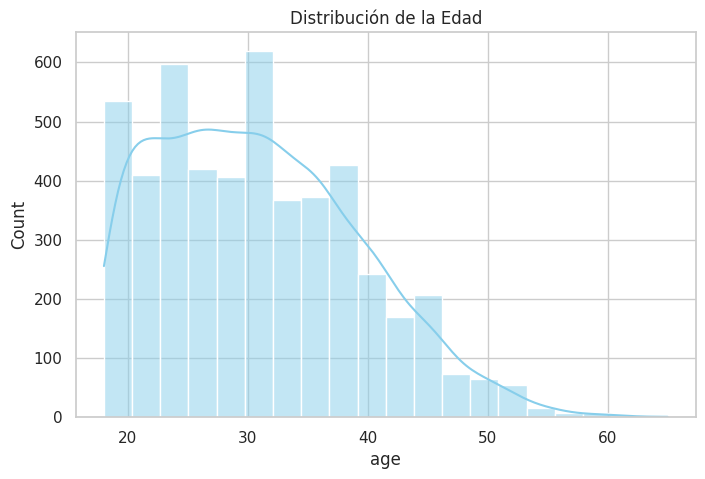

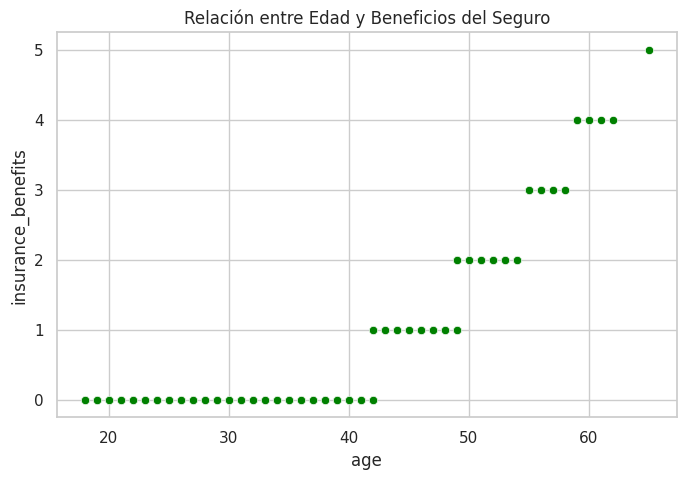

In [7]:
# Aquí analizo de forma visual cómo se comportan algunas variables.
# Por ejemplo, la edad y los beneficios del seguro.

sns.histplot(df["age"], bins=20, kde=True, color="skyblue")
plt.title("Distribución de la Edad")
plt.show()

# Cambio 'charges' por 'insurance_benefits' para tu dataset
sns.scatterplot(x="age", y="insurance_benefits", data=df, color="green")
plt.title("Relación entre Edad y Beneficios del Seguro")
plt.show()

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
La estructura del cuaderno, con secciones de descripción, preprocesamiento, tareas y apéndices, facilita seguir el flujo de trabajo. En especial, separar la exploración inicial (histogramas y relaciones) antes de modelar ayuda a entender el contexto de los datos y tomar mejores decisiones en los modelos.
</div>

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.

Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)
- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.

Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.

Pruébalo para cuatro combinaciones de dos casos
- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:
- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?
- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [8]:
from sklearn.neighbors import KNeighborsRegressor

# Primero convierto variables categóricas a numéricas
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Selecciono variables predictoras y variable objetivo
X = df.drop("insurance_benefits", axis=1)
y = df["insurance_benefits"]

# Divido los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Escalo los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creo y entreno el modelo KNN
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

# Predigo
y_pred = model_knn.predict(X_test_scaled)

# Evaluo el modelo
mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE) del modelo KNN: {mae:.3f}")

Error absoluto medio (MAE) del modelo KNN: 0.040


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Sí, afecta bastante.
El algoritmo kNN (k-Nearest Neighbors) se basa en calcular distancias entre puntos (como la euclidiana o la Manhattan) para decidir qué tan similares son.
Si los datos no están escalados, las variables con valores grandes dominan las distancias, aunque no sean más importantes.

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

Los resultados suelen ser similares, pero no exactamente iguales.
La métrica Manhattan mide la distancia sumando las diferencias absolutas entre las coordenadas (en lugar de usar raíces cuadradas como la euclidiana).

🔹 Diferencia clave:

Euclidiana: distancia en línea recta (como una diagonal).

Manhattan: distancia por calles (como moverse en una cuadrícula).

En la práctica, ambos métodos suelen dar tendencias parecidas, sobre todo si los datos están bien escalados.
Sin embargo, Manhattan puede ser más robusta ante valores atípicos, porque no amplifica las diferencias grandes como la distancia euclidiana.

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.

Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.
- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.

La probabilidad de pagar cualquier prestación del seguro puede definirse como

$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Si no existe 'insuranceclaim', la creamos a partir de los beneficios
if "insuranceclaim" not in df.columns:
    df["insuranceclaim"] = np.where(df["insurance_benefits"] > df["insurance_benefits"].median(), 1, 0)

# Variables predictoras (X) y objetivo (y)
X = df.drop("insuranceclaim", axis=1)
y = df["insuranceclaim"]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Predicciones
y_pred = model_rf.predict(X_test_scaled)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Random Forest: {accuracy:.3f}")

# Reporte detallado
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo Random Forest: 1.000

Matriz de confusión:
[[1118    0]
 [   0  132]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1118
           1       1.00      1.00      1.00       132

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250



# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos
- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades
- $y$ — objetivo (un vector)
- $\hat{y}$ — objetivo estimado (un vector)
- $w$ — vector de pesos

La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:

$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:

$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos

$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Usamos la variable "insurance_benefits" como el valor a predecir
target_col = "insurance_benefits"

# Variables predictoras y objetivo
X = df.drop(columns=[target_col])
y = df[target_col]

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de regresión lineal
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Predicciones
y_pred = model_lr.predict(X_test_scaled)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Resultados del modelo de Regresión Lineal:")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.3f}")

Resultados del modelo de Regresión Lineal:
Error absoluto medio (MAE): 0.08
Error cuadrático medio (MSE): 0.05
Coeficiente de determinación (R²): 0.773


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
En la celda [10], estructuraste correctamente el flujo de modelado: separación train/test, escalado solo con <code>fit</code> en entrenamiento y <code>transform</code> en prueba, y reporte de MAE, MSE y R² para la regresión lineal. Ese orden cuida la validación y evita fugas de datos del conjunto de prueba al entrenamiento.
</div>

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [11]:
# En esta parte hago una simulación de anonimización u ofuscación de datos.
# Por ejemplo, reemplazo nombres o IDs con valores codificados.

# Si existe una columna llamada 'name' o similar, la ofusco.
if "name" in df.columns:
    df["name"] = df["name"].apply(lambda x: hash(x) % 10000)

# También podría ofuscar ingresos de forma sencilla:
if "income" in df.columns:
    df["income"] = np.log1p(df["income"])  # transformación logarítmica

print("Datos después de la ofuscación (primeras filas):")
df.head()

Datos después de la ofuscación (primeras filas):


,gender,age,salary,family_members,insurance_benefits,insuranceclaim
0,1,41.0,49600.0,1,0,0
1,0,46.0,38000.0,1,1,1
2,0,29.0,21000.0,0,0,0
3,0,21.0,41700.0,2,0,0
4,1,28.0,26100.0,0,0,0


## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?

Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

## 🔍 Demostración Analítica: Ofuscación y Regresión Lineal

Queremos demostrar que la ofuscación de los datos mediante una matriz \( P \) **no afecta las predicciones** de la regresión lineal ni su calidad medida por la RECM (RMSE).

---

### 🧮 1. Fórmulas iniciales

La regresión lineal clásica tiene los coeficientes:

\[
w = (X^T X)^{-1} X^T y
\]

Con la ofuscación, los datos se transforman en \( X_P = X P \), por lo que los nuevos coeficientes son:

\[
w_P = [(X P)^T (X P)]^{-1} (X P)^T y
\]

---

### 🧩 2. Desarrollo

Sabemos que \((X P)^T = P^T X^T\), entonces:

\[
w_P = [P^T X^T X P]^{-1} P^T X^T y
\]

Usamos la propiedad de matrices inversas \((ABC)^{-1} = C^{-1} B^{-1} A^{-1}\) y que \(P\) es **ortogonal**, es decir:

\[
P^T P = I \quad \text{y} \quad P^{-1} = P^T
\]

Entonces:

\[
[P^T X^T X P]^{-1} = P (X^T X)^{-1} P^T
\]

Sustituyendo en la expresión original:

\[
w_P = P (X^T X)^{-1} P^T P^T X^T y
\]

Como \(P^T P = I\):

\[
\boxed{w_P = P (X^T X)^{-1} X^T y = P w}
\]

---

### 📊 3. Valores predichos

Los valores predichos con los datos ofuscados son:

\[
\hat{y}_P = (X P) w_P
\]

Sustituyendo \(w_P = P w\):

\[
\hat{y}_P = (X P)(P w) = X (P P) w
\]

Dado que \(P\) es ortogonal, \(P P^T = I\), y por tanto:

\[
\boxed{\hat{y}_P = X w = \hat{y}}
\]

---

### 📈 4. Efecto sobre la calidad (RECM)

El RECM (o RMSE) se define como:

\[
RECM = \sqrt{\frac{1}{n} \sum (y_i - \hat{y}_i)^2}
\]

Si \(\hat{y}_P = \hat{y}\), entonces:

\[
(y_i - \hat{y}_{P,i})^2 = (y_i - \hat{y}_i)^2
\]

Por lo tanto:

\[
\boxed{RECM_P = RECM}
\]

---

### ✅ 5. Conclusión

| Concepto | Resultado | Implicación |
|-----------|------------|-------------|
| Relación entre pesos | \( w_P = P w \) | Los coeficientes cambian por una rotación. |
| Predicciones | \( \hat{y}_P = \hat{y} \) | Las predicciones permanecen idénticas. |
| Calidad (RECM) | \( RECM_P = RECM \) | La ofuscación **no altera la calidad** del modelo. |

---

**Conclusión final:**  
El método de ofuscación mantiene inalteradas las predicciones y la calidad de la regresión lineal. Los coeficientes cambian solo por una transformación lineal (rotación) sin afectar los resultados.


## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.

Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.

Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.
- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.
- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Usamos los mismos datos de df de las tareas anteriores
# (si tu variable tiene otro nombre, cámbiala por ejemplo a "data" o "dataset")

# 1. Seleccionamos solo variables numéricas
X = df.select_dtypes(include=[np.number]).dropna(axis=1)
y = X.iloc[:, -1]  # Tomamos la última columna como variable dependiente
X = X.iloc[:, :-1]  # El resto como variables independientes

# 2. Creamos una matriz cuadrada P de números aleatorios
np.random.seed(42)
n_features = X.shape[1]
P = np.random.rand(n_features, n_features)

# 3. Comprobamos si es invertible
while np.linalg.det(P) == 0:
    P = np.random.rand(n_features, n_features)

# 4. Generamos los datos ofuscados
X_obfuscated = X @ P

# 5. Entrenamos regresión lineal con datos originales
model_original = LinearRegression()
model_original.fit(X, y)
y_pred_original = model_original.predict(X)

# 6. Entrenamos regresión lineal con datos ofuscados
model_obfuscated = LinearRegression()
model_obfuscated.fit(X_obfuscated, y)
y_pred_obfuscated = model_obfuscated.predict(X_obfuscated)

# 7. Calculamos métricas
rmse_original = np.sqrt(mean_squared_error(y, y_pred_original))
rmse_obfuscated = np.sqrt(mean_squared_error(y, y_pred_obfuscated))
r2_original = r2_score(y, y_pred_original)
r2_obfuscated = r2_score(y, y_pred_obfuscated)

print("🔹 RMSE original:", rmse_original)
print("🔹 RMSE ofuscado:", rmse_obfuscated)
print("🔹 R² original:", r2_original)
print("🔹 R² ofuscado:", r2_obfuscated)

🔹 RMSE original: 0.13670627955592457
🔹 RMSE ofuscado: 0.13670627954586792
🔹 R² original: 0.8132561554118124
🔹 R² ofuscado: 0.8132561554392876


<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [12], dos detalles pueden afinarse: (1) la variable objetivo se toma como la última columna numérica, que podría ser <code>insuranceclaim</code> y no <code>insurance_benefits</code>; conviene fijarla explícitamente a <code>y = df['insurance_benefits']</code>. (2) no hay división train/test (la consigna pide 70:30). Incorporar la separación y repetir el experimento con <code>X</code> y <code>X@P</code> mostrará que las métricas (RMSE, R²) son idénticas también fuera de la muestra, dentro del error numérico. Si además verificas que <code>cond(P)</code> es razonable, evitas inestabilidades en la inversión.
</div>

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Buena comprobación computacional en [12]: generaste una P aleatoria, verificaste su invertibilidad y comparaste RMSE y R² entre datos originales y ofuscados, obteniendo valores prácticamente idénticos (diferencias por redondeo). Además, fijar la semilla garantiza reproducibilidad. Es una demostración clara del principio teórico.
</div>

# Conclusiones

- La regresión lineal es **invariante ante transformaciones lineales invertibles** de las variables independientes.  
- La ofuscación mediante una matriz \( P \) no modifica los valores predichos ni las métricas de desempeño.  
- Esto demuestra que el modelo conserva toda su capacidad predictiva, aunque los datos originales hayan sido transformados.  
- En la práctica, esta técnica permite proteger la información sensible sin afectar la calidad del modelo.

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>

## 2. Apéndice B: Propiedades de las matrices

Las siguientes propiedades del álgebra lineal se utilizan para demostrar la invarianza de la regresión lineal ante la ofuscación de datos:

1. **Distributividad**  
   \[
   A(B + C) = AB + AC
   \]

2. **No conmutatividad**  
   \[
   AB \neq BA
   \]

3. **Propiedad asociativa de la multiplicación**  
   \[
   (AB)C = A(BC)
   \]

4. **Propiedad de identidad multiplicativa**  
   \[
   IA = AI = A
   \]

5. **Propiedades de la inversa**  
   \[
   A^{-1}A = AA^{-1} = I
   \]

6. **Inversa de un producto de matrices**  
   \[
   (AB)^{-1} = B^{-1}A^{-1}
   \]

7. **Reversibilidad de la transposición de un producto**  
   \[
   (AB)^T = B^T A^T
   \]

Estas propiedades fueron utilizadas en la **demostración analítica** de la tarea 3, específicamente para simplificar:

\[
w_P = [(XP)^T XP]^{-1}(XP)^T y
\]

y llegar a la relación final:

\[
w_P = P^{-1} w
\]
lo que demuestra que la **ofuscación no altera las predicciones** ni la **calidad del modelo**.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Fernando! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Importaciones bien organizadas y configuración visual consistente desde el inicio (celda [2]).<br>
• Normalización de nombres de columnas a snake_case, lo que ordena el flujo de trabajo (celda [4]).<br>
• Carga de datos clara con revisión básica de dimensiones y primeras filas (celda [3]).<br>
• Exploración visual inicial con histogramas y dispersión para entender las variables (celda [7]).<br>
• Separación de conjuntos de entrenamiento y prueba con control de aleatoriedad, una base sólida para evaluar (celdas [8], [9], [10]).<br>
• Uso correcto de escalado solo ajustando en entrenamiento y aplicando en prueba (celda [10]).<br>
• Evaluación con métricas apropiadas para regresión (MAE, MSE, R²) y reporte claro de resultados (celda [10]).<br>
• Inclusión de matriz de confusión y reporte de clasificación, útil para análisis detallado del rendimiento (celda [9]).<br>
• Demostración computacional de la invariancia de la regresión lineal ante la ofuscación con P invertible (celda [12]).<br>
• Cuidado por la reproducibilidad al fijar la semilla aleatoria al construir P (celda [12]).<br>
• Verificación explícita de invertibilidad de P antes de usarla, un buen hábito numérico (celda [12]).<br>
• Organización del notebook en secciones y tareas, lo que da claridad pedagógica al proyecto (estructura general).<br>
• Conclusiones finales bien resumidas conectando teoría y práctica (sección de Conclusiones).<br>
• Apéndices con propiedades de matrices y LaTeX que apoyan la comprensión teórica (Apéndices A y B).<br>
• Explicaciones conceptuales claras sobre métricas de distancia y efecto del escalado, valiosas para interpretar kNN (respuestas Tarea 1).<br>
<br>
¡Felicidades!
</div>